# Overview of PyLandStats

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors

import pylandstats as pls

# let us use a custom colormap
custom_cmap = colors.ListedColormap([
    (0, 0, 0, 0),
    (0.6, 0, 0, 1),
    (.95, .9, .75, 1),
], N=3)
cm.register_cmap(name='custom', cmap=custom_cmap)
plt.rcParams['image.cmap'] = 'custom'

## Landscape analysis

We can load landscapes from raster files and compute pandas data frames of patch, class and landscape level. See the notebook [01-landscape-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/01-landscape-analysis.ipynb) for more thorough demonstration.

<AxesSubplot:>

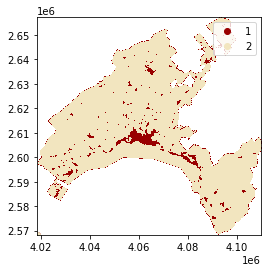

In [2]:
ls = pls.Landscape('../data/clc/vaud_g100_clc00_V18_5.tif')
ls.plot_landscape(legend=True)

In [3]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,115.0,10600.0,92.173913,2.409091,1.129654,1431.782106
1,1,13.0,2600.0,200.000000,1.625000,1.100096,223.606798
2,1,2.0,600.0,300.000000,1.000000,1.011893,223.606798
3,1,69.0,6000.0,86.956522,1.764706,1.087917,316.227766
4,1,76.0,8800.0,115.789474,2.444444,1.136721,316.227766


In [4]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,24729.0,7.701939,193,0.060111,2.069921,1431600.0,4.458771,22.949206,169.574514,128.129534,...,1.081665,0.200096,0.035772,3.298134,1023.354950,707.998485,781.024968,6772.087205,879.913199,85.983187
2,296346.0,92.298061,13,0.004049,89.451374,1431600.0,4.458771,10.053260,257139.077804,22795.846154,...,1.069990,0.206571,0.056823,5.322120,246.645899,202.442542,223.606798,116.227766,38.386100,15.563243


In [5]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,area_am,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
0,321075.0,206,0.064159,89.451374,1431600.0,4.458771,9.716931,257308.652318,1558.616505,257308.652318,...,0.037678,3.477259,974.33933,241.380151,700.0,6772.087205,872.438139,89.541509,73.40177,0.271429


## Spatio-temporal analysis

Given a temporally-ordered sequence of landscape snapshots, we can also analyze the spatio-temporal patterns of landscape change. To that end, PyLandStats can compute pandas dataframes with the evolution of the metrics and plot them, both at the class and landscape level. See the notebook [02-spatiotemporal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/02-spatiotemporal-analysis.ipynb) for a more thorough demonstration.

<a id='spatiotemporal-analysis'></a>

In [6]:
input_filepaths = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=[2000, 2006, 2012])

In [7]:
sta.compute_class_metrics_df()

metric           total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         2000      24729.0                 7.701939              193.0   
          2006      24599.0                 7.661450              200.0   
          2012      24766.0                 7.713463              201.0   
2         2000     296346.0                92.298061               13.0   
          2006     296476.0                92.338550                8.0   
          2012     296309.0                92.286537                8.0   

metric           patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         2000        0.060111             2.069921   1431600.0      4.458771   
          2006        0.062291             2.022269   1436000.0      4.472475   
          2012        0.062602             2.022269   1445900.0      4.503309   
2         2000        0.004049            89.451374   1431600.0      4.458771   
          2006        0.002492            89.131823   1436000.0      4.472475   
          2012        0.002492            89.091645   1445900.0      4.503309   

metric           landscape_shape_index  effective_mesh_size       area_mn  \
class_val dates                                                             
1         2000               22.949206           169.574514    128.129534   
          2006               23.089172           155.620852    122.995000   
          2012               23.180952           155.770004    123.213930   
2         2000               10.053260        257139.077804  22795.846154   
          2006               10.074380        255311.195671  37059.500000   
          2012               10.117539        255079.261914  37038.625000   

metric           ...  fractal_dimension_md  fractal_dimension_ra  \
class_val dates  ...                                               
1         2000   ...              1.081665              0.200096   
          2006   ...              1.080760              0.195545   
          2012   ...              1.079173              0.195545   
2         2000   ...              1.069990              0.206571   
          2006   ...              1.087916              0.194132   
          2012   ...              1.087916              0.194539   

metric           fractal_dimension_sd  fractal_dimension_cv  \
class_val dates                                               
1         2000               0.035772              3.298134   
          2006               0.035250              3.251775   
          2012               0.034800              3.209637   
2         2000               0.056823              5.322120   
          2006               0.054895              5.018827   
          2012               0.055087              5.035463   

metric           euclidean_nearest_neighbor_mn  euclidean_nearest_neighbor_am  \
class_val dates                                                                 
1         2000                     1023.354950                     707.998485   
          2006                     1003.278185                     703.960301   
          2012                     1005.065677                     703.368299   
2         2000                      246.645899                     202.442542   
          2006                      239.112378                     202.435580   
          2012                      239.112378                     202.426329   

metric           euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
class_val dates                                                                 
1         2000                      781.024968                    6772.087205   
          2006                      721.110255                    6772.087205   
          2012                      728.010989                    6772.087205   
2         2000               

In [8]:
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,area_am,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,321075.0,206.0,0.064159,89.451374,1431600.0,4.458771,9.716931,257308.652318,1558.616505,257308.652318,...,0.037678,3.477259,974.339330,241.380151,700.000000,6772.087205,872.438139,89.541509,73.401770,0.271429
2006,321075.0,208.0,0.064782,89.131823,1436000.0,4.472475,9.736332,255466.816523,1543.629808,255466.816523,...,0.036252,3.343042,973.887192,240.859645,714.108518,6772.087205,878.977491,90.254549,73.462946,0.270422
2012,321075.0,209.0,0.065094,89.091645,1445900.0,4.503309,9.779982,255235.031918,1536.244019,255235.031918,...,0.035837,3.304230,975.746891,241.066300,721.110255,6772.087205,872.972328,89.467088,73.330913,0.271715


We can also plot the time series of metrics at the class level, e.g., the evolution of the proportion of landscape occupied by the land use class value `1` (urban):

<AxesSubplot:ylabel='PLAND'>

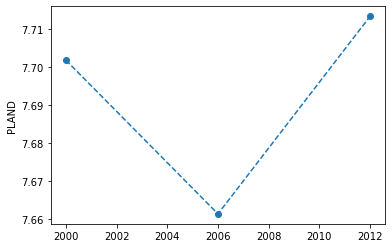

In [9]:
sta.plot_metric('proportion_of_landscape', class_val=1)

or we can also plot at the landscape level by not providing any `class_val` argument, e.g., the evolution of the area-weighted mean fractal dimension of all the patches of the landscape:

<AxesSubplot:ylabel='FRAC_AM'>

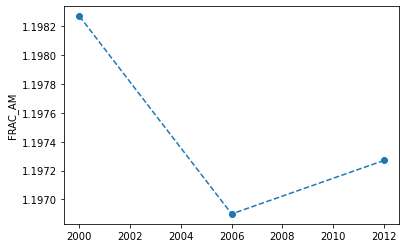

In [10]:
sta.plot_metric('fractal_dimension_am')

## Zonal analysis

Landscape metrics are very sensitive to the spatial extent of the map. PyLandStats features two classes to perform zonal analysis, `ZonalAnalysis` and `BufferAnalysis`. The former allows the user to fully customize how the spatial extent (zones) are defined, while the latter will define the spatial extents by adding buffers around a feature of interest. 
In fact, `BufferAnalysis` might be used to perform the "gradient analysis" approach from landscape ecology, which consists in evaluating the spatial variation of the landscape patterns as one moves progressively from the highly-developed urban cores to the less intense suburbs until the rural and natural hinterlands. See the notebook [03-zonal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/03-zonal-analysis.ipynb) for a more thorough demonstration.

<a id='zonal-analysis'></a>

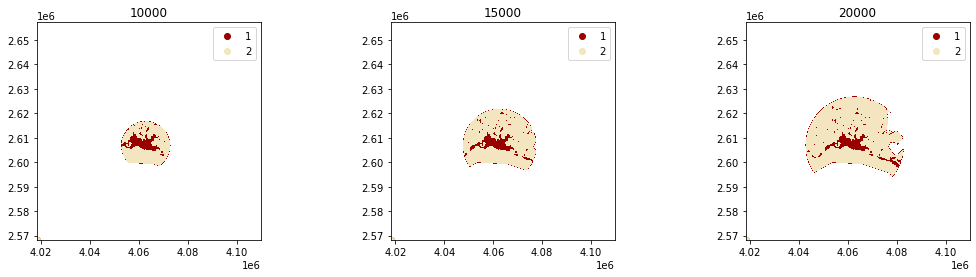

In [11]:
from shapely.geometry import Point

# latitude and longitude of the center of Lausanne according to OpenStreetMap
base_mask = Point(6.6327025, 46.5218269)
base_mask_crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

# buffer distances (in meters)
buffer_dists = [10000, 15000, 20000]

# initialize a `BufferAnalysis` instance
ba = pls.BufferAnalysis(
    '../data/clc/vaud_g100_clc00_V18_5.tif', base_mask, buffer_dists, 
    base_mask_crs=base_mask_crs)

# plot the landscape
fig = ba.plot_landscapes()

In [12]:
ba.compute_class_metrics_df()

metric                  total_area  proportion_of_landscape  \
class_val buffer_dists                                        
1         10000             7261.0                24.964758   
          15000             9630.0                16.710627   
          20000            12149.0                13.347616   
2         10000            21824.0                75.035242   
          15000            47998.0                83.289373   
          20000            78871.0                86.652384   

metric                  number_of_patches  patch_density  largest_patch_index  \
class_val buffer_dists                                                          
1         10000                      20.0       0.068764            21.547189   
          15000                      46.0       0.079822            11.532588   
          20000                      76.0       0.083498             7.301692   
2         10000                       4.0       0.013753            74.361355   
          15000                       4.0       0.006941            82.949261   
          20000                       5.0       0.005493            86.315096   

metric                  total_edge  edge_density  landscape_shape_index  \
class_val buffer_dists                                                    
1         10000           223900.0      7.698126               6.742690   
          15000           395200.0      6.857777              10.147208   
          20000           565200.0      6.209624              12.963801   
2         10000           223900.0      7.698126               4.966216   
          15000           395200.0      6.857777               5.794989   
          20000           565200.0      6.209624               6.631673   

metric                  effective_mesh_size       area_mn  ...  \
class_val buffer_dists                                     ...   
1         10000                 1353.370913    363.050000  ...   
          15000                  774.307351    209.347826  ...   
          20000                  515.419677    159.855263  ...   
2         10000                16083.663125   5456.000000  ...   
          15000                39651.804019  11999.500000  ...   
          20000                67812.981685  15774.200000  ...   

metric                  fractal_dimension_md  fractal_dimension_ra  \
class_val buffer_dists                                               
1         10000                     1.083177              0.163172   
          15000                     1.079439              0.141302   
          20000                     1.082422              0.167805   
2         10000                     1.064530              0.134831   
          15000                     1.064530              0.145607   
          20000                     1.087755              0.170269   

metric                  fractal_dimension_sd  fractal_dimension_cv  \
class_val buffer_dists                                               
1         10000                     0.043469              4.026701   
          15000                     0.030989              2.855440   
          20000                     0.034473              3.189557   
2         10000                     0.053805              4.982272   
          15000                     0.057990              5.356493   
          20000                     0.058537              5.409182   

metric                  euclidean_nearest_neighbor_mn  \
class_val buffer_dists                                  
1         10000                            633.890519   
          15000                            768.449416   
          20000                            825.643072   
2         10000                            211.803399   
          15000                            223.606798   
          20000                            229.442719   

metric                  euclidean_nearest_neighbor_am  \
class_val buffer_dists                                  
1         10000        

In [13]:
ba.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,area_am,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
buffer_dists,,,,,,,,,,,,,,,,,,,,,
10000,29085.0,24.0,0.082517,74.361355,223900.0,7.698126,4.396199,17437.034038,1211.875000,17437.034038,...,0.045356,4.201216,563.542666,219.870431,380.277564,1723.538406,448.983664,79.671636,47.839841,0.561948
15000,57628.0,50.0,0.086763,82.949261,395200.0,6.857777,5.336798,40426.111369,1152.560000,40426.111369,...,0.033956,3.129477,724.862006,244.398142,616.227766,1686.890520,446.514358,61.599912,57.165558,0.451268
20000,91020.0,81.0,0.088991,86.315096,565200.0,6.209624,6.235099,68328.401362,1123.703704,68328.401362,...,0.036423,3.369744,788.840581,224.949611,632.455532,2218.677324,535.714287,67.911603,62.299321,0.392942


Analogously to the spatio-temporal analysis, we can use the `plot_metric` method to plot how the computed metrics respond to increasing buffer distances, e.g., how the proportion of landscape occupied by the land use class value `1` (urban) as we increase the buffer distance

<AxesSubplot:ylabel='PLAND'>

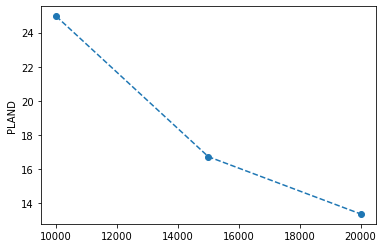

In [14]:
ba.plot_metric('proportion_of_landscape', class_val=1)

Like in the spatio-temporal analysis, the plots at the landscape level can obtained by not providing any `class_val` argument.

## Spatio-temporal buffer analysis

Landscape metrics are very sensitive to the spatial extent of the considered map. Therefore, we might also want to evaluate how the computed time series of metrics responds to changes in the map extent. This is why PyLandStats features an additional `SpatioTemporalBufferAnalysis` analysis class. See the notebook [04-spatiotemporal-buffer-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb) for a more thorough demonstration.

Let us take the sequence of landscapes `input_filepaths` from [the spatio-temporal analysis above](#spatiotemporal-analysis) and let us use again the `dates` argument to specify the dates that correspond to each landscape.
Let us also take the latitude and longitude of the center of Lausanne as well as the buffer distances defined in [the zonal analysis above](#zonal-analysis). Now we can construct our `SpatioTemporalBufferAnalysis` instance and evaluate the sensitive of our spatio-temporal analysis to the extent of the map:

In [15]:
stba = pls.SpatioTemporalBufferAnalysis(
    input_filepaths, base_mask, buffer_dists, base_mask_crs=base_mask_crs,
    dates=[2000, 2006, 2012])

In [16]:
stba.compute_class_metrics_df()

metric                      total_area proportion_of_landscape  \
buffer_dist class_val dates                                      
10000       1         2000        7261                 24.9648   
                      2006        7205                 24.7722   
                      2012        7205                 24.7722   
            2         2000       21824                 75.0352   
                      2006       21880                 75.2278   
                      2012       21880                 75.2278   
15000       1         2000        9630                 16.7106   
                      2006        9278                 16.0998   
                      2012        9320                 16.1727   
            2         2000       47998                 83.2894   
                      2006       48350                 83.9002   
                      2012       48308                 83.8273   
20000       1         2000       12149                 13.3476   
                      2006       11827                 12.9938   
                      2012       11882                 13.0543   
            2         2000       78871                 86.6524   
                      2006       79193                 87.0062   
                      2012       79138                 86.9457   

metric                      number_of_patches patch_density  \
buffer_dist class_val dates                                   
10000       1         2000                 20      0.068764   
                      2006                 20      0.068764   
                      2012                 20      0.068764   
            2         2000                  4     0.0137528   
                      2006                  4     0.0137528   
                      2012                  4     0.0137528   
15000       1         2000                 46     0.0798223   
                      2006                 49     0.0850281   
                      2012                 50     0.0867634   
            2         2000                  4    0.00694107   
                      2006                  4    0.00694107   
                      2012                  4    0.00694107   
20000       1         2000                 76     0.0834981   
                      2006                 78     0.0856955   
                      2012                 79     0.0867941   
            2         2000                  5     0.0054933   
                      2006                  6    0.00659196   
                      2012                  7    0.00769062   

metric                      largest_patch_index total_edge edge_density  \
buffer_dist class_val dates                                               
10000       1         2000              21.5472     223900      7.69813   
                      2006              21.0211     226600      7.79096   
                      2012              21.0211     227000      7.80471   
            2         2000              74.3614     223900      7.69813   
                      2006              74.5539     226600      7.79096   
                      2012              74.5539     227000      7.80471   
15000       1         2000              11.5326     395200      6.85778   
                      2006              11.2671     391300       6.7901   
                      2012              11.2671     395500      6.86298   
            2         2000              82.9493     395200      6.85778   
                      2006              83.5601     391300       6.7901   
                      2012              83.4872     395500      6.86298   
20000       1         2000              7.30169     565200      6.20962   
                      2006               7.1336     566200      6.22061   
                      2012               7.1336     571400      6.27774   
            2         2000              86.3151     565200      6.20962   
                      2006              86.6678     566200      6.22

<AxesSubplot:ylabel='PLAND'>

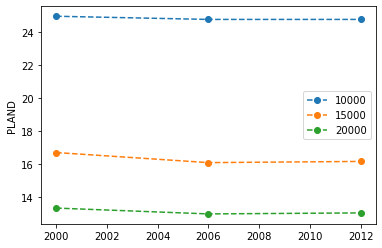

In [17]:
stba.plot_metric('proportion_of_landscape', class_val=1)